# Pandas: maken en visualiseren van dataframes

## 1 Maken van dataframe uit csv-bestand
- Lees 'sales data-set.csv'in als het dataframe sales waarbij je de 'Date' kolom als datetime kolom instelt.

In [1]:
import pandas as pd
sales = pd.read_csv('sales data-set.csv', parse_dates = ['Date'], dayfirst = True)

## 2 Inspecteren
- Voer de basis inspecteerfuncties uit om inzicht te krijgen in het dataframe.
    - Wat is de mediane omzet?
    - Wat is het hoogste winkelnummer?
    - Welke datatypes zijn er?

In [15]:
print(sales.describe())
print(sales.info())
print(sales.head())

import numpy as np
print(f"\nWeekly sales median is = {sales.Weekly_Sales.agg(np.median)}\n")
print(f"Highest store number is = {sales.Store.max()}\n")
print(f"Datatypes of the dataframe are = \n\n{sales.dtypes}")

               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.

## 3 Omzet per week
- Importeer de pyplot module van matplotlib
- Voeg de kolom 'Year' en 'Week' toe aan het dataframe met daarin het jaar en het weeknummer uit de 'Date' kolom.
- Maak sales_2011 met daarin alleen de regels uit 2011.
- Maak sales_2011_by_date waarin je de omzet (Weekly_Sales) optelt per week.
- Toon een lijngrafiek met daarin de omzet per week.

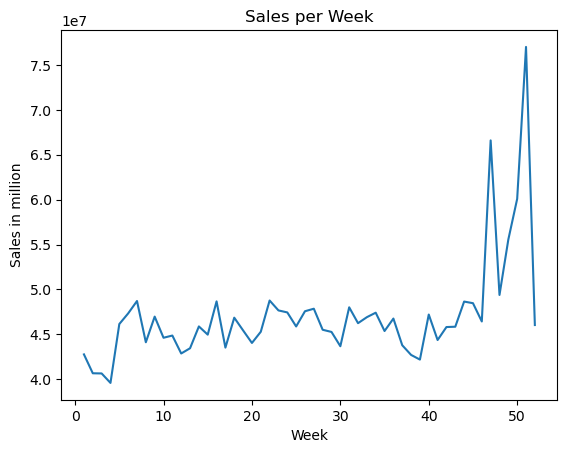

In [39]:
from matplotlib import pyplot as plt

sales["Year"] = sales["Date"].dt.year
sales["Week"] = sales["Date"].dt.isocalendar().week

sales_2011 = sales[sales.Year == 2011]

sales_2011_by_date = sales_2011.groupby("Week")["Weekly_Sales"].sum()

sales_2011_by_date.plot(kind="line", x="Week", y="Weekly Sales")
plt.title("Sales per Week")
plt.ylabel("Sales in million")
plt.show()


## 4 Sales per year
- Maak het dataframe sales_by_year met daarin de totale omzet (Weekly_Sales) per jaar. 
- Toon een barchart met daarin de omzet per jaar.

Year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Year'>

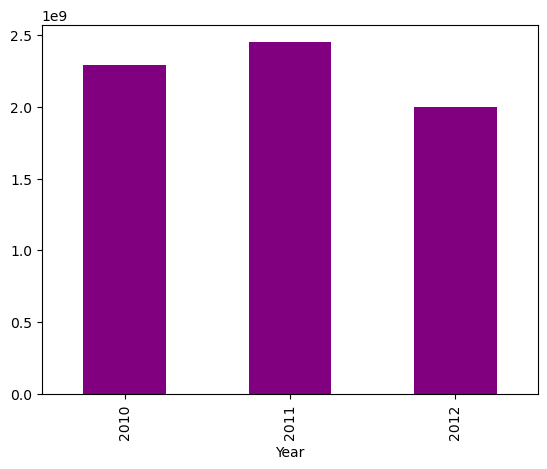

In [36]:
sales_by_year = sales.groupby("Year")["Weekly_Sales"].sum()
display(sales_by_year)
sales_by_year.plot(kind='bar',x='Year', y='Weekly_Sales', color="purple")

## 5 Read feature data
- Lees 'Features data set.csv' in als het dataframe features waarbij je de 'Date' kolom als datetime kolom instelt.

In [43]:
features = pd.read_csv("features.csv", parse_dates=True)
display(features)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


## 6 Ontbrekende gegevens
- Maak een staafdiagram waarin het aantal missende waardes per kolom wordt getoond.

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

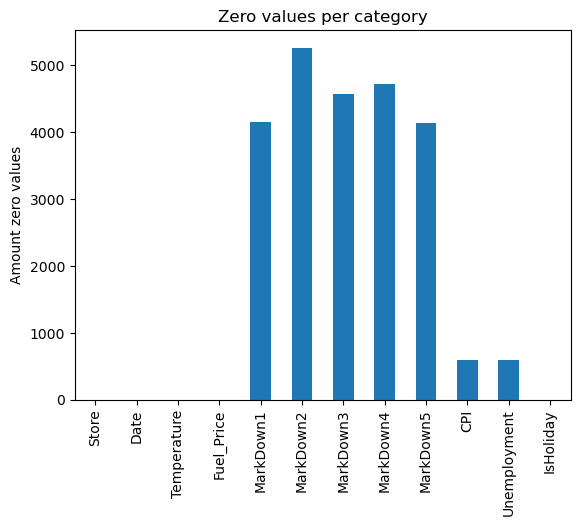

In [51]:
test = features.isna().sum()
display(test)
test.plot(kind="bar")
plt.ylabel("Amount zero values")
plt.title("Zero values per category")
plt.show

## 7 Vullen van missende waardes
- Maak features_filled waarin je de missende waardes vervangt door 0.
- Maak een leeg staafdiagram waarmee je laat zien dat er geen missende waardes meer zijn.

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572       0.00       0.00   
1         1  2010-02-12        38.51       2.548       0.00       0.00   
2         1  2010-02-19        39.93       2.514       0.00       0.00   
3         1  2010-02-26        46.63       2.561       0.00       0.00   
4         1  2010-03-05        46.50       2.625       0.00       0.00   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0          0.00       0.00       0

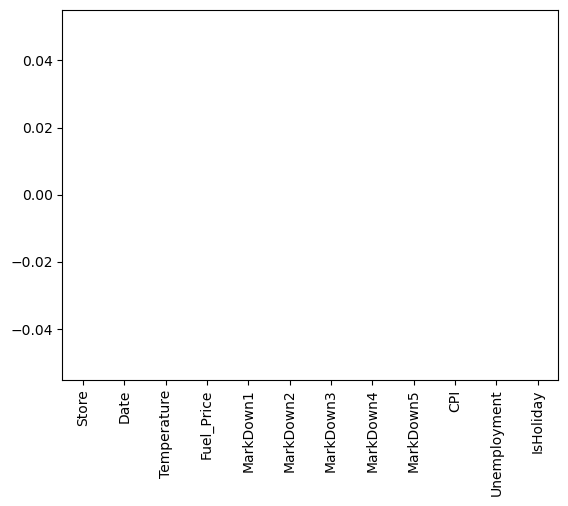

In [57]:
features_filled = features.fillna(0)
print(features_filled)

features_filled.isna().sum().plot(kind="bar")
plt.show()

## 8 Exporteren als CSV-bestand
- Maak een csv-bestand van sales_by_year.

In [56]:
sales_by_year.to_csv("sales_by_year.csv")

## 9 Histogram
- Maak een histogram van de omzet (Weekly_Sales) in sales?
- Wat maak je op uit dit histogram?

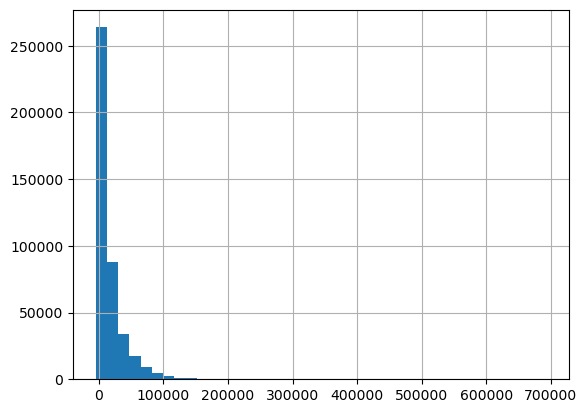

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [61]:
sales.Weekly_Sales.hist(bins=40)
plt.show()
display(sales.Weekly_Sales)

# grote verschil tussen omzetten

- Bereken de mediaan en het gemiddelde van de omzet (Weekly_Sales)
- Wat verklaart het grote verschil?

In [66]:
import numpy as np
test = sales["Weekly_Sales"].agg([np.median, np.mean])
display(test)

# meer laag omzet dan hoog omzet in de data / hoge omzet uitschieters

median     7612.030000
mean      15981.258123
Name: Weekly_Sales, dtype: float64

- Maak een histogram met 12 bins voor de alleen de omzetten tussen 0 en 30000.
- Welke range van omzet komt het meeste voor?
- Is dit de omzet per?  
A) week  
B) week / winkel  
C) week / winkel / afdeling  

array([[<AxesSubplot:title={'center':'Weekly_Sales'}>]], dtype=object)

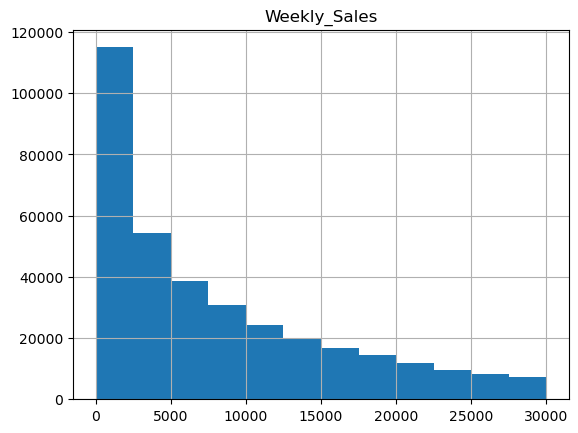

In [69]:
to_plot = sales[(sales["Weekly_Sales"] >= 0) & (sales["Weekly_Sales"] <= 30000)]
to_plot.hist("Weekly_Sales", bins=12)

# 0-5000 range
# Omzet per week, winkel en de afdeling